**Project for Delhi Metro Network Analysis**

*Import relevant libraries*

In [1]:
#install operational libraries
import pandas as pd
import numpy as np

#install visulisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#for setting renders and templates
import plotly.io as pio
pio.renderers.default = 'iframe' #With the iframe renderers, the figure data are stored in the individual HTML files rather than in the notebook itself, resulting in a smaller notebook size.
pio.templates.default = "plotly_white" 

**Load data from csv file**

In [2]:
delhi_metro = pd.read_csv(r'C:\Users\TalhaKhan\Downloads\Delhi Metro Clean.csv')

*View table*

In [3]:
delhi_metro.head()

,station_id,station_name,distance_from_start,line,opening_date,station_layout,latitude,longitude
0,1,Jhil Mil,10.3,Red line,06-04-2008,Elevated,28.675648,77.312393
1,2,Welcome [Conn: Red],46.8,Pink line,31-10-2018,Elevated,28.671986,77.277931
2,3,DLF Phase 3,10.0,Rapid Metro,14-11-2013,Elevated,28.494329,77.093552
3,4,Okhla NSIC,23.8,Magenta line,25-12-2017,Elevated,28.554575,77.264870
4,5,Dwarka Mor,10.2,Blue line,30-12-2005,Elevated,28.619366,77.033188


**Exploratory Data Analysis**

In [4]:
delhi_metro.dtypes

station_id               int64
station_name            object
distance_from_start    float64
line                    object
opening_date            object
station_layout          object
latitude               float64
longitude              float64
dtype: object

Note data type of opening date is an object. Convert it to datetime.

In [5]:
delhi_metro['opening_date'] = pd.to_datetime(delhi_metro['opening_date'], format='%d-%m-%Y')

delhi_metro.dtypes

station_id                      int64
station_name                   object
distance_from_start           float64
line                           object
opening_date           datetime64[ns]
station_layout                 object
latitude                      float64
longitude                     float64
dtype: object

*Check for null values in the table*

In [6]:
delhi_metro.isnull().sum()

station_id             0
station_name           0
distance_from_start    0
line                   0
opening_date           0
station_layout         0
latitude               0
longitude              0
dtype: int64

There are no null values

**Plot the longitudes and latitudes on Delhi Map**

*Import Folium library*

In [7]:
import folium
from folium.features import DivIcon

*Create a map for Delhi*

*Place markers for each station based on their line colour*

In [8]:
delhi_map = folium.Map(location=(28.644800, 77.216721), tiles='cartodb positron', zoom_start=11)

#Create a dictionary to assign colours to each line
line_colours = {'Red line': 'red', 'Pink line': 'pink', 'Rapid Metro': 'cadetblue', 'Magenta line': 'darkred',
       'Blue line': 'blue', 'Aqua line': 'black', 'Voilet line': 'purple', 'Yellow line': 'yellow',
       'Green line': 'green', 'Gray line': 'lightgray', 'Orange line': 'orange', 'Green line branch': 'lightgreen',
       'Blue line branch': 'lightblue'}

#Create an empty dictionary to store information about markers such as colour an tooltip
marker_info = {}

#Iterate each row in the DataFrame
for index, row in delhi_metro.iterrows():
    line = row['line']
    lat_long = (row['latitude'], row['longitude'])
    colour = line_colours.get(line, 'darkblue')
    tooltip_info = f'Station Name: {row['station_name']}, Line: {line}<br>'
    
    if lat_long not in marker_info:
        marker_info[lat_long] = {'colour': colour, 'tooltip': ''}

    marker_info[lat_long]['tooltip'] += tooltip_info
    
for lat_long, info in marker_info.items():
    tooltip_text = info['tooltip']
    colour = info['colour']
    
    folium.CircleMarker(location=lat_long,
                        radius=5,
                        tooltip=tooltip_text,
                        color='black',
                        fill=False,
                        fill_color=colour,
                        fill_opacity=0.5,
                        weight=1).add_to(delhi_map)

map_title = 'Delhi Metro Network'
title_html = f'<h1 style="position:absolute;z-index:100000;left:40vw;font-size:30px" >{map_title}</h1>'
delhi_map.get_root().html.add_child(folium.Element(title_html))

delhi_map

*If the map is not visible in github preview. Please use the below link*

https://nbviewer.org/github/talhakb16/Delhi-Metro-Analysis/blob/main/Delhi%20Metro.ipynb

**Here's a map displaying Delhi Metro stations spread across the city. Each marker represents a station, and you can hover over or click on them to see the station name and the metro line it's part of. This map helps visualize how the metro stations are distributed in Delhi.**

***Plot a Bar chart to understand growth of Delhi Metro across years***

*Create a table number of stations for each opening year*

In [9]:
delhi_metro['opening_year'] = delhi_metro['opening_date'].dt.year

stations_per_year = delhi_metro['opening_year'].value_counts().sort_index().reset_index()

stations_per_year.columns = ['opening_year', 'no_of_stations']

stations_per_year

,opening_year,no_of_stations
0,2002,6
1,2003,4
2,2004,11
3,2005,28
4,2006,9
5,2008,3
6,2009,17
7,2010,54
8,2011,13
9,2013,5


*Plot the Bar Chart*

In [10]:
figure = plt.figure(figsize = (10,5))

fig = px.bar(stations_per_year,
            x='opening_year',
            y='no_of_stations',
            title='Number of metro stations opened each year',
            labels={'opening_year': 'Opening Year', 'no_of_stations': 'Number of Stations'})

fig.update_layout(xaxis=dict(tickmode='linear'))

fig.show()

<Figure size 1000x500 with 0 Axes>

*If the bar chart is not visible in github preview. Please use the below link*

https://nbviewer.org/github/talhakb16/Delhi-Metro-Analysis/blob/main/Delhi%20Metro.ipynb

**The bar chart depicts the number of Delhi Metro stations inaugurated each year, providing insights into the network's temporal evolution. It showcases periods of rapid expansion alongside years with limited or no new stations, potentially influenced by factors such as planning, funding, or construction challenges.**

**Key Observations:**

**Yearly Fluctuations: There are significant fluctuations in the number of stations inaugurated each year, indicating periods of both rapid expansion and slower growth.**

**Periods of Rapid Growth: Years such as 2005, 2010, 2018, and 2019 stand out for their relatively high numbers of station inaugurations, suggesting phases of accelerated network expansion.**

**Years with Limited Growth: Certain years, like 2003, 2007, 2008, 2012, 2014 and 2016 show minimal station inaugurations, indicating potential challenges or delays in metro network development during those periods.**

**Based on these insights, here are some measures that can be taken to improve the opening of metro stations:**

**Plan Ahead: Think long-term to know where more metro stations will be needed.**

**Use Money Wisely: Make sure there's enough money to build new metro stations. Spend it where it's needed the most.**

**Cut Red Tape: Make it easier to get permission to build new stations by working with the government.**

**Plot two histograms to understand the density of each line**

*Create a table with total number of stations and average distance between stations for each line*

In [11]:
stations_per_line = delhi_metro['line'].value_counts()

total_distance_per_line = delhi_metro.groupby(['line'])['distance_from_start'].max()

avg_distance_per_line = round(total_distance_per_line/stations_per_line,2)

line_depth = pd.DataFrame({'line': stations_per_line.index,
                          'no_of_stations': stations_per_line.values,
                          'avg_distance': avg_distance_per_line.values})

line_depth

,line,no_of_stations,avg_distance
0,Blue line,49,1.29
1,Pink line,38,1.08
2,Yellow line,37,1.01
3,Voilet line,34,1.30
4,Red line,29,1.18
5,Magenta line,25,0.70
6,Aqua line,21,1.32
7,Green line,21,3.47
8,Rapid Metro,11,1.38
9,Blue line branch,8,0.91


*Plot two histograms*

C:\Users\TalhaKhan\AppData\Local\Temp\ipykernel_1056\915654890.py:12: UserWarning:

You have mixed positional and keyword arguments, some input may be discarded.



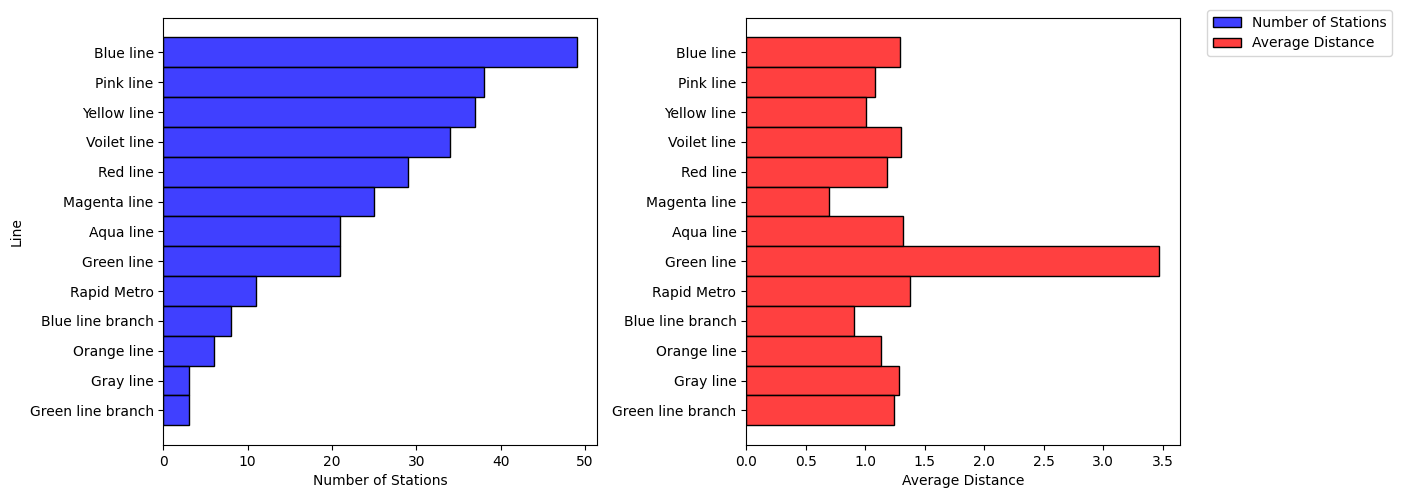

In [12]:
fig, axes = plt.subplots(1, 2, figsize= (12,5))

f1 = sns.histplot(data=line_depth, y='line', weights='no_of_stations', color='blue', ax=axes[0])
f2 = sns.histplot(data=line_depth, y='line', weights='avg_distance', color='red', ax=axes[1])

axes[0].set_ylabel('Line')
axes[1].set(ylabel=None)
axes[0].set_xlabel('Number of Stations')
axes[1].set_xlabel('Average Distance')

labels = ['Number of Stations', 'Average Distance']
fig.legend([f1, f2], labels=labels, loc='upper right', bbox_to_anchor=(1.17, 1))

plt.tight_layout()
plt.show()

**High-Density Lines: Lines with a larger number of stations and shorter average distances between stations indicate higher density. For example, the Blue line, Pink line, and Yellow line have relatively high station counts and low average distances, suggesting these lines serve densely populated areas with frequent stops.**

**Low-Density Lines: Lines with fewer stations and longer average distances between stations indicate lower density. For instance, the Gray line, Orange line, and Green line branch have a small number of stations and comparatively longer average distances between stations, suggesting these lines cover less densely populated areas with fewer stops.**

**Medium-Density Lines: Some lines fall in between, with moderate station counts and average distances between stations. These lines may serve areas with moderate population density or cover longer distances with fewer stops for express service.**

**Variability Across Lines: There is variability in line density across the metro network, reflecting the diverse urban landscape of Delhi and the varying transportation needs of different areas.**

**Create a pie chart to show distribution of station layouts**

*Create a variable with number of stations for each station layout*

In [13]:
station_layout = delhi_metro['station_layout'].value_counts()

station_layout

station_layout
Elevated       214
Underground     68
At-Grade         3
Name: count, dtype: int64

*Plot the pie chart*

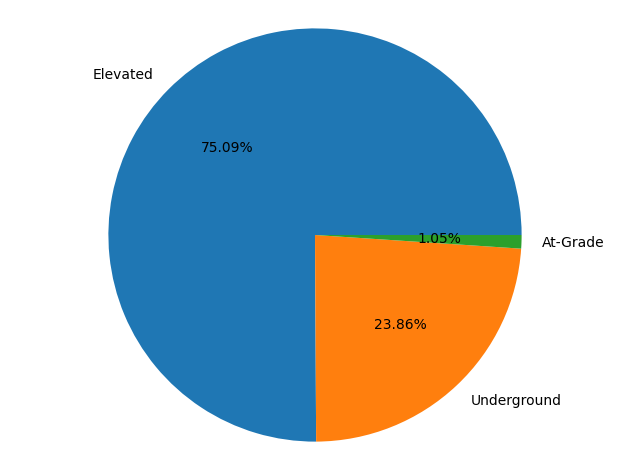

In [14]:
plt.pie(station_layout.values, labels=station_layout.index, autopct='%1.2f%%')

plt.axis('equal')
plt.tight_layout()
plt.show()

**The above pie chart shows the distribution of different station layouts in the Delhi Metro Network**

**Observations:**

**Elevated Stations: The predominant station layout in the Delhi Metro network is elevated, reflecting a common urban design approach aimed at conserving space and mitigating land acquisition challenges.**

**Underground Stations: While fewer in number, underground stations exist within the network, particularly in densely populated or central areas where above-ground construction may be impractical.**

**At-Grade Stations: At-grade (ground level) stations are relatively scarce, indicating their lesser prevalence within the network. This scarcity could be attributed to factors such as land availability and traffic considerations.**

**Reasons for more Elevated Stations:**

**Cost-Effectiveness: Elevated stations are generally cheaper to construct compared to underground stations due to lower excavation and tunneling costs. This cost-effectiveness makes them a preferred choice for expanding metro networks rapidly within budget constraints.**

**Faster Construction: Elevated stations can be built more quickly than underground stations since they require less extensive excavation and can be constructed in open spaces without disrupting existing infrastructure. This enables faster expansion of the metro network to serve growing urban areas.**

**Availability of Space: Delhi has relatively more available space for elevated construction compared to densely built-up urban areas. This availability of space facilitates the construction of elevated stations without significant land acquisition challenges or disruptions to existing urban development.**

**Flexibility in Design: Elevated stations offer greater flexibility in design and construction compared to underground stations, allowing for easier adaptation to varying site conditions and construction constraints. This flexibility contributes to the efficiency and cost-effectiveness of elevated station construction.**

*Create a map for station layout*

*Plot markers for each layout*

In [15]:
station_layout_map = folium.Map(location=(28.644800, 77.216721), tiles='cartodb positron', zoom_start=11)

layout_colours = {'Elevated': 'green', 'Underground': 'blue', 'At-Grade': 'black'}

marker_info = {}

for index, row in delhi_metro.iterrows():
    station_layout = row['station_layout']
    lat_long = (row['latitude'], row['longitude'])
    colour = layout_colours.get(station_layout, 'darkblue')
    tooltip_info = f'Station Name: {row['station_name']}, Layout: {station_layout}<br>'
    
    if lat_long not in marker_info:
        marker_info[lat_long] = {'colour': colour, 'tooltip': ''}

    marker_info[lat_long]['tooltip'] += tooltip_info
    
for lat_long, info in marker_info.items():
    tooltip_text = info['tooltip']
    colour = info['colour']
    
    folium.CircleMarker(location=lat_long,
                        radius=5,
                        tooltip=tooltip_text,
                        color='black',
                        fill=False,
                        fill_color=colour,
                        fill_opacity=0.5,
                        weight=1).add_to(station_layout_map)

map_title = 'Station Layout Spread'
title_html = f'<h1 style="position:absolute;z-index:100000;left:40vw;font-size:3S0px" >{map_title}</h1>'
station_layout_map.get_root().html.add_child(folium.Element(title_html))

station_layout_map

*If the map is not visible in github preview. Please use the below link*

https://nbviewer.org/github/talhakb16/Delhi-Metro-Analysis/blob/main/Delhi%20Metro.ipynb

**Central Delhi, being the heart of the city, is densely populated and highly congested, with a high demand for efficient transportation solutions. The presence of numerous historical landmarks, government offices, commercial centers, and residential areas makes it a focal point for transportation infrastructure development, including underground metro stations. Here are several reasons why Central Delhi has more underground metro stations than other regions**

**Limited Space Above Ground: Central Delhi is characterized by limited space due to its dense urban fabric and historical significance. Building large, elevated metro stations in such areas could disrupt the cityscape, heritage sites, and existing infrastructure. Hence, underground metro stations offer a practical solution to accommodate the transportation needs without altering the surface landscape significantly.**

**Preservation of Heritage Sites: Central Delhi is home to several iconic heritage sites such as the Red Fort, Jama Masjid, Humayun's Tomb, and Qutub Minar, among others. Constructing elevated metro stations in close proximity to these sites could potentially compromise their structural integrity or visual aesthetics. Underground stations minimize the visual impact on heritage sites, preserving their cultural significance.**